### Importação dos dados



In [3]:
import pandas as pd

caminho_base = "D:\\Estudos\\ONE-Data_Science\\base_dados\\"

loja = pd.read_csv(caminho_base + "loja_1.csv")
loja2 = pd.read_csv(caminho_base + "loja_2.csv")
loja3 = pd.read_csv(caminho_base + "loja_3.csv")
loja4 = pd.read_csv(caminho_base + "loja_4.csv")


#1. Análise do faturamento


In [2]:
# Calculando o faturamento total por loja
faturamento_loja = loja["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()

# Mostrando os resultados formatados
print(f"Faturamento Loja 1: R$ {faturamento_loja:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")


Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


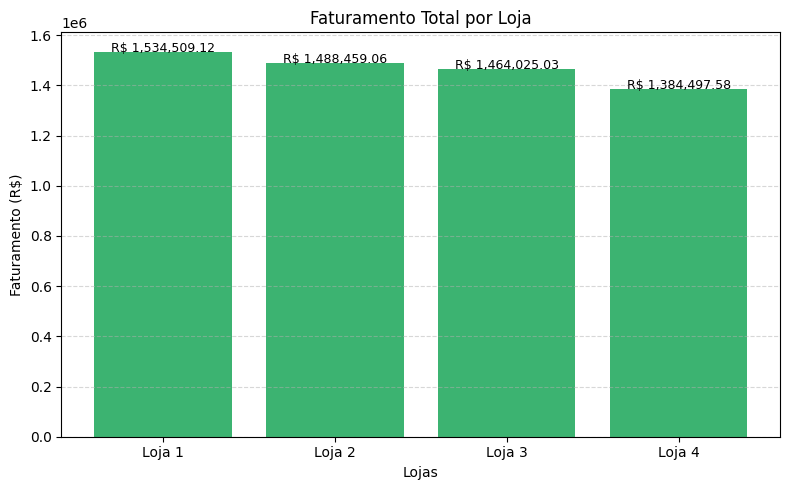

In [3]:
import matplotlib.pyplot as plt

# Gráfico de barras do faturamento
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamentos = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

plt.figure(figsize=(8, 5))
plt.bar(lojas, faturamentos, color='mediumseagreen')
plt.title("Faturamento Total por Loja")
plt.ylabel("Faturamento (R$)")
plt.xlabel("Lojas")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adiciona os valores em cima das barras
for i, valor in enumerate(faturamentos):
    plt.text(i, valor + 100, f"R$ {valor:,.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [4]:
# Agrupando por categoria e somando os valores
faturamento_categoria = pd.concat([loja, loja2, loja3, loja4])
faturamento_categoria = faturamento_categoria.groupby("Categoria do Produto")["Preço"].sum().sort_values(ascending=False)

# Exibindo o resultado
print("Faturamento por Categoria:\n")
for categoria, valor in faturamento_categoria.items():
    print(f"{categoria}: R$ {valor:,.2f}")


Faturamento por Categoria:

eletronicos: R$ 2,214,099.72
eletrodomesticos: R$ 1,766,337.03
moveis: R$ 1,010,214.00
instrumentos musicais: R$ 465,029.67
esporte e lazer: R$ 190,635.39
brinquedos: R$ 98,140.86
utilidades domesticas: R$ 76,773.38
livros: R$ 50,260.74


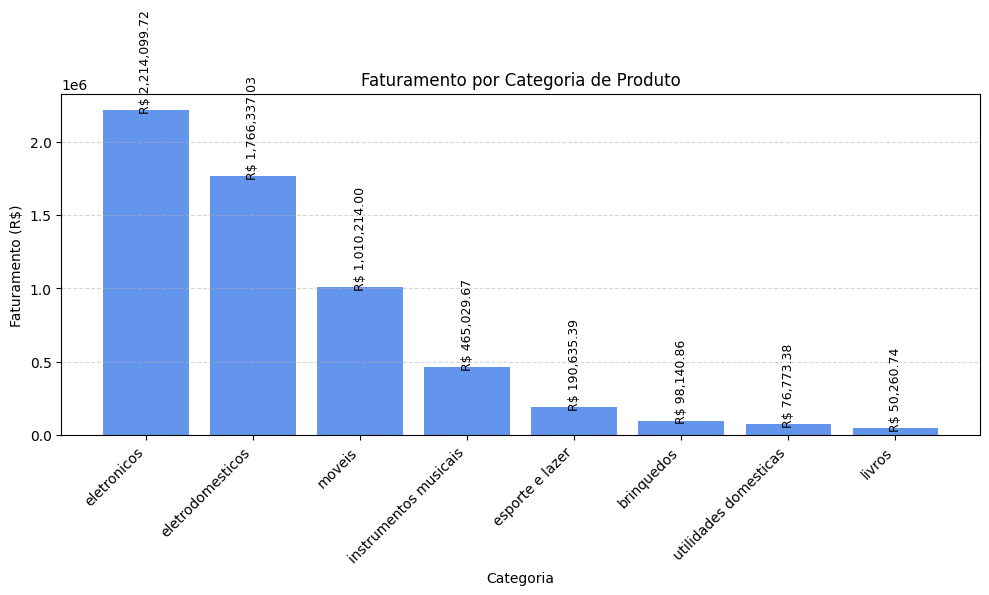

In [5]:
import matplotlib.pyplot as plt

# Gráfico de barras por categoria
plt.figure(figsize=(10, 6))
plt.bar(faturamento_categoria.index, faturamento_categoria.values, color='cornflowerblue')
plt.title("Faturamento por Categoria de Produto")
plt.xlabel("Categoria")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adiciona os valores em cima das barras
for i, valor in enumerate(faturamento_categoria.values):
    plt.text(i, valor + 100, f"R$ {valor:,.2f}", ha='center', fontsize=9, rotation=90)

plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [7]:
# Calculando a média de avaliação de cada loja
media_avaliacao_loja1 = loja["Avaliação da compra"].mean()
media_avaliacao_loja2 = loja2["Avaliação da compra"].mean()
media_avaliacao_loja3 = loja3["Avaliação da compra"].mean()
media_avaliacao_loja4 = loja4["Avaliação da compra"].mean()

# Mostrando os resultados formatados
print(f"Média de Avaliação - Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Média de Avaliação - Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Média de Avaliação - Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Média de Avaliação - Loja 4: {media_avaliacao_loja4:.2f}")


Média de Avaliação - Loja 1: 3.98
Média de Avaliação - Loja 2: 4.04
Média de Avaliação - Loja 3: 4.05
Média de Avaliação - Loja 4: 4.00


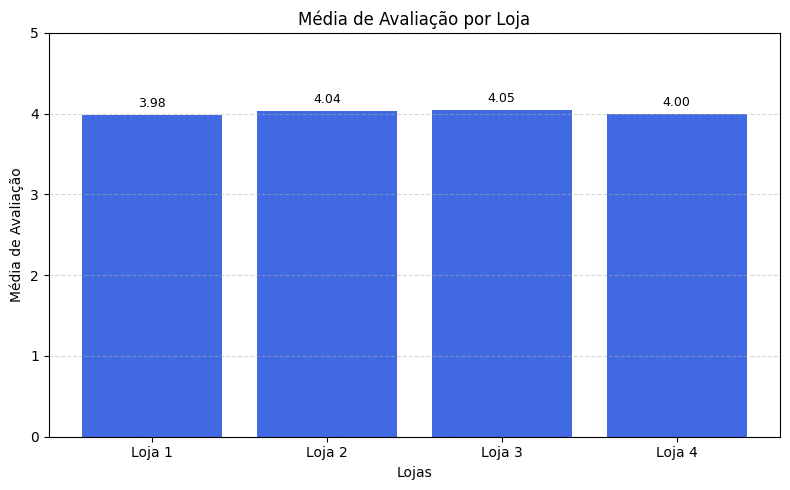

In [8]:
# Dados para o gráfico
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
avaliacoes = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]

# Criando o gráfico
plt.figure(figsize=(8, 5))
plt.bar(lojas, avaliacoes, color='royalblue')
plt.title("Média de Avaliação por Loja")
plt.ylabel("Média de Avaliação")
plt.xlabel("Lojas")
plt.ylim(0, 5)  # assumindo que a escala de avaliação vai até 5
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adiciona os valores em cima das barras
for i, valor in enumerate(avaliacoes):
    plt.text(i, valor + 0.1, f"{valor:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [4]:
import matplotlib.pyplot as plt

# Função para mostrar os gráficos de produtos mais e menos vendidos
def mostrar_vendas(loja, nome_loja):
    # Contagem de vendas por produto
    contagem = loja['Produto'].value_counts()

    # Produtos mais vendidos (top 5)
    mais_vendidos = contagem.head(5)
    
    # Produtos menos vendidos (bottom 5)
    menos_vendidos = contagem.tail(5)

    # Exibindo as informações no console
    print(f"{nome_loja} - Produtos mais vendidos:\n{mais_vendidos}\n")
    print(f"{nome_loja} - Produtos menos vendidos:\n{menos_vendidos}\n")

    # Gráfico - mais vendidos
    plt.figure(figsize=(10, 5))
    plt.barh(mais_vendidos.index[::-1], mais_vendidos.values[::-1], color='mediumblue')
    plt.title(f"{nome_loja} - Top 5 Produtos Mais Vendidos")
    for i, v in enumerate(mais_vendidos.values[::-1]):
        plt.text(v + 0.2, i, str(v), va='center')
    plt.xlabel("Quantidade Vendida")
    plt.tight_layout()
    plt.show()

    # Gráfico - menos vendidos
    plt.figure(figsize=(10, 5))
    plt.barh(menos_vendidos.index[::-1], menos_vendidos.values[::-1], color='tomato')
    plt.title(f"{nome_loja} - Bottom 5 Produtos Menos Vendidos")
    for i, v in enumerate(menos_vendidos.values[::-1]):
        plt.text(v + 0.2, i, str(v), va='center')
    plt.xlabel("Quantidade Vendida")
    plt.tight_layout()
    plt.show()


Loja 1 - Produtos mais vendidos:
Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Name: count, dtype: int64

Loja 1 - Produtos menos vendidos:
Produto
Ciência de dados com python    39
Pandeiro                       36
Panela de pressão              35
Headset                        33
Celular ABXY                   33
Name: count, dtype: int64



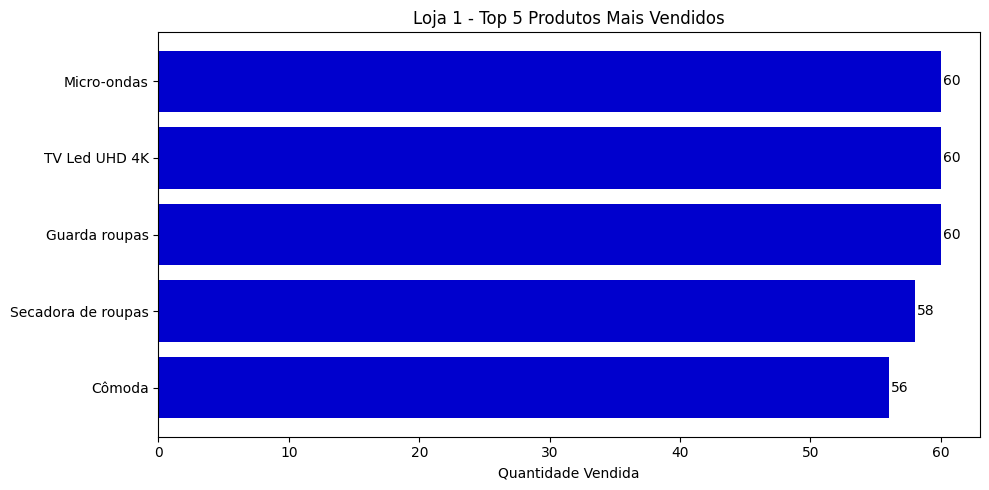

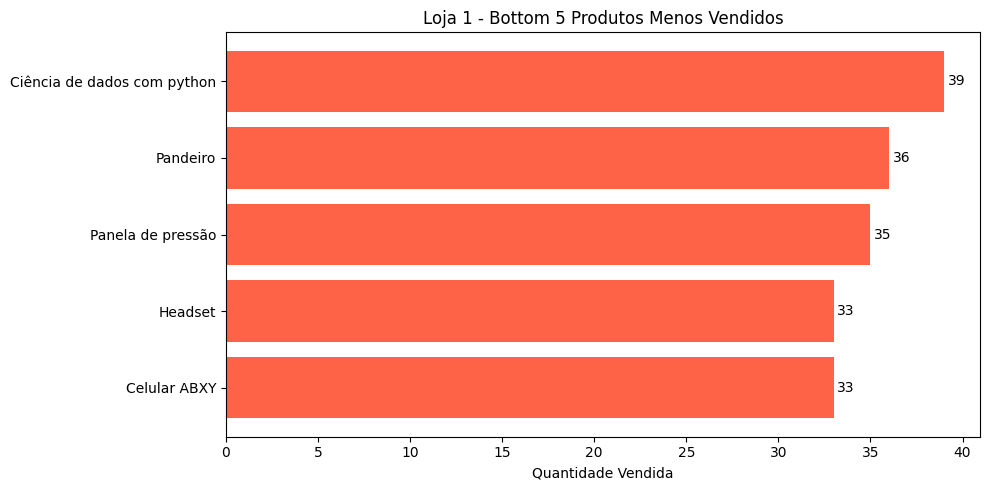

Loja 2 - Produtos mais vendidos:
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: count, dtype: int64

Loja 2 - Produtos menos vendidos:
Produto
Fone de ouvido       37
Poltrona             35
Mesa de jantar       34
Impressora           34
Jogo de tabuleiro    32
Name: count, dtype: int64



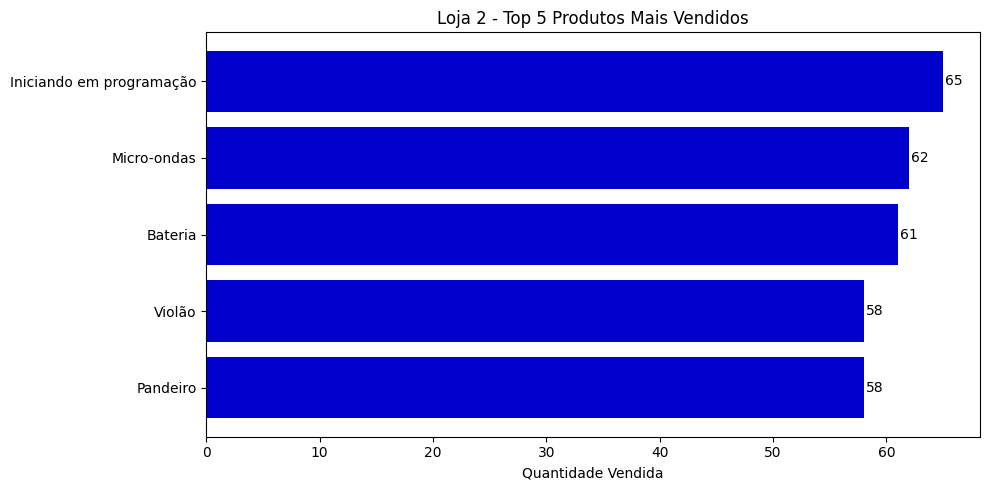

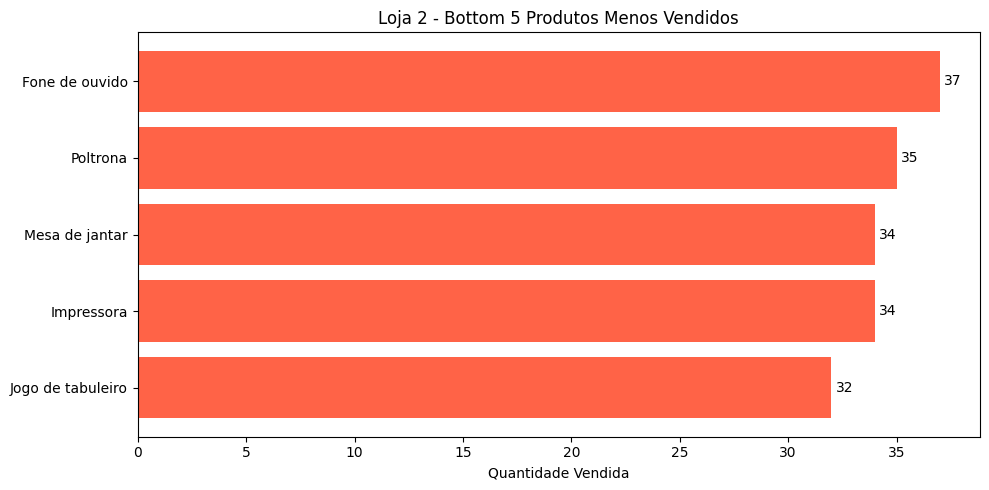

Loja 3 - Produtos mais vendidos:
Produto
Kit banquetas      57
Mesa de jantar     56
Cama king          56
Jogo de panelas    55
Cômoda             55
Name: count, dtype: int64

Loja 3 - Produtos menos vendidos:
Produto
Guitarra            38
Jogo de copos       36
Mochila             36
Micro-ondas         36
Blocos de montar    35
Name: count, dtype: int64



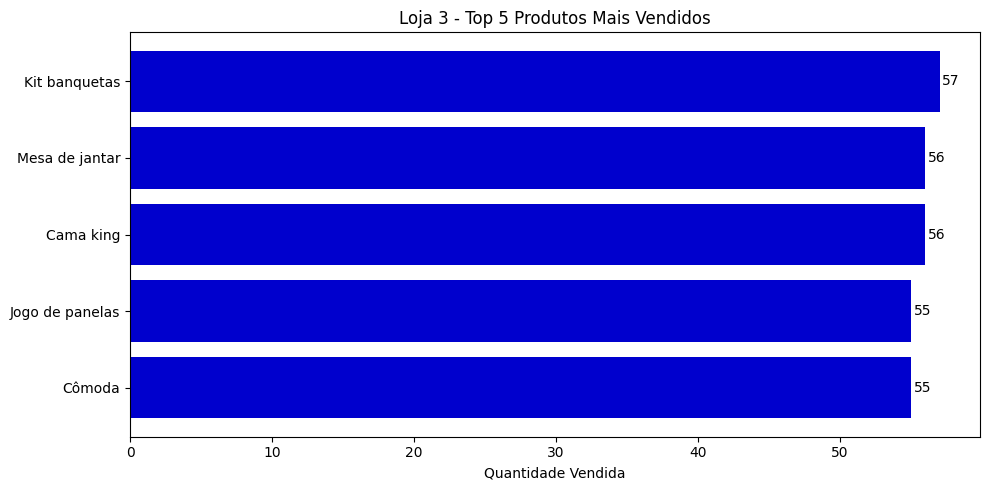

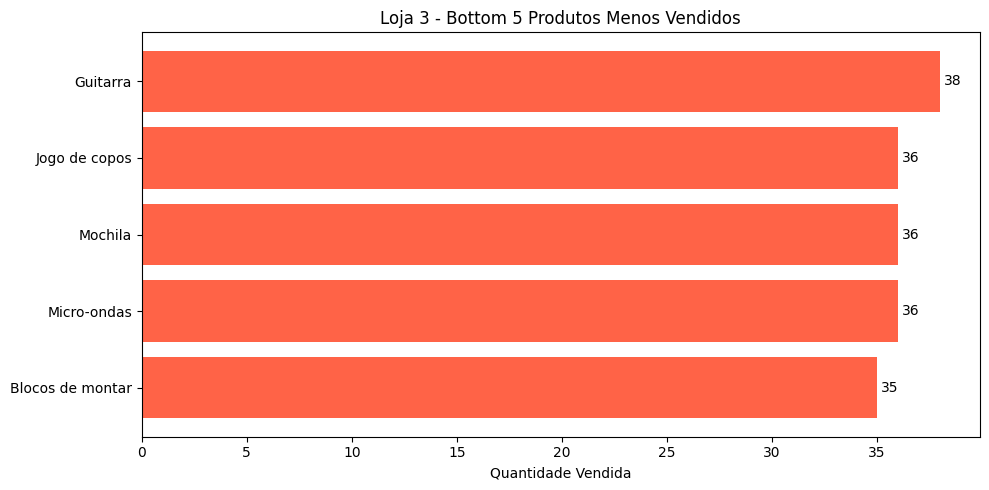

Loja 4 - Produtos mais vendidos:
Produto
Cama box                    62
Faqueiro                    59
Dashboards com Power BI     56
Cama king                   56
Carrinho controle remoto    55
Name: count, dtype: int64

Loja 4 - Produtos menos vendidos:
Produto
Geladeira                      38
Ciência de dados com python    38
Violão                         37
Guarda roupas                  34
Guitarra                       33
Name: count, dtype: int64



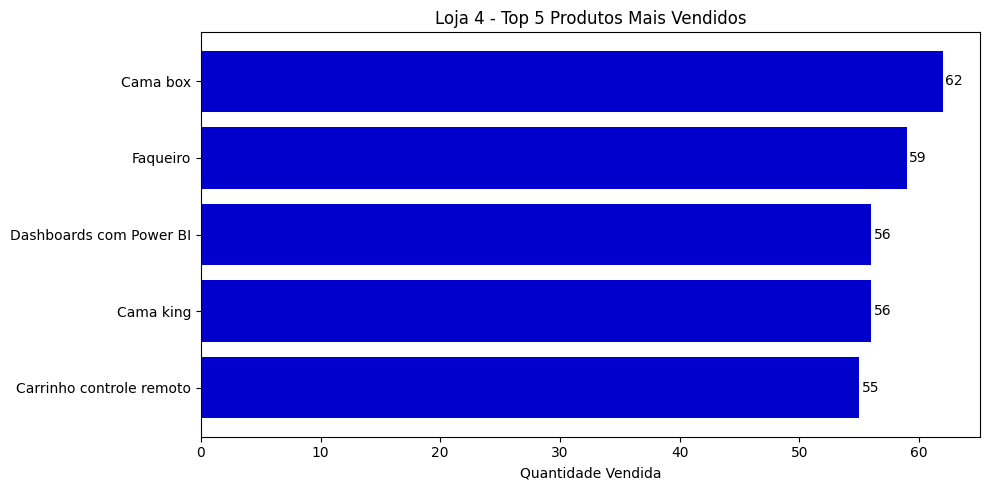

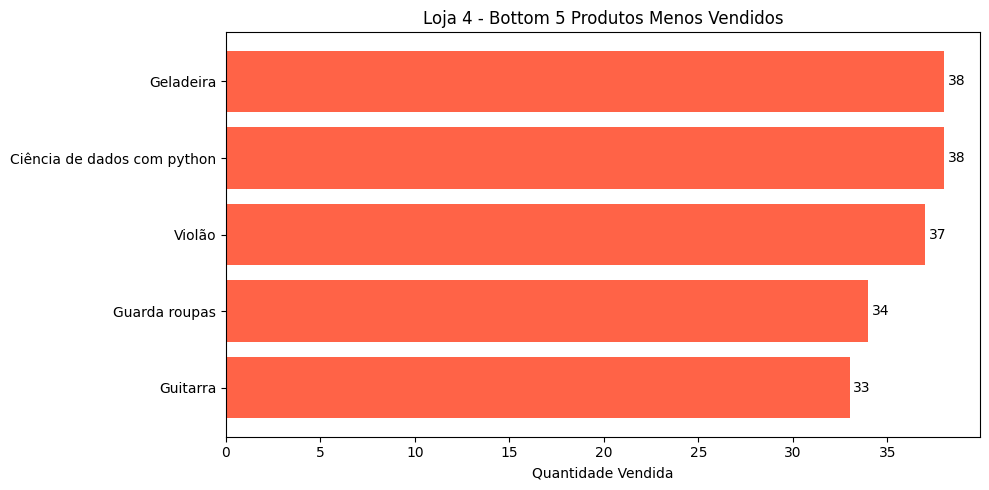

In [6]:
# Chama a função para cada loja
mostrar_vendas(loja, "Loja 1")
mostrar_vendas(loja2, "Loja 2")
mostrar_vendas(loja3, "Loja 3")
mostrar_vendas(loja4, "Loja 4")


# 5. Frete Médio por Loja


In [7]:
import matplotlib.pyplot as plt

# Função para calcular e exibir o frete médio de uma loja
def mostrar_frete_medio(loja, nome_loja):
    frete_medio = loja["Frete"].mean()
    print(f"{nome_loja} - Frete Médio: R$ {frete_medio:,.2f}")
    return frete_medio


Loja 1 - Frete Médio: R$ 34.69
Loja 2 - Frete Médio: R$ 33.62
Loja 3 - Frete Médio: R$ 33.07
Loja 4 - Frete Médio: R$ 31.28


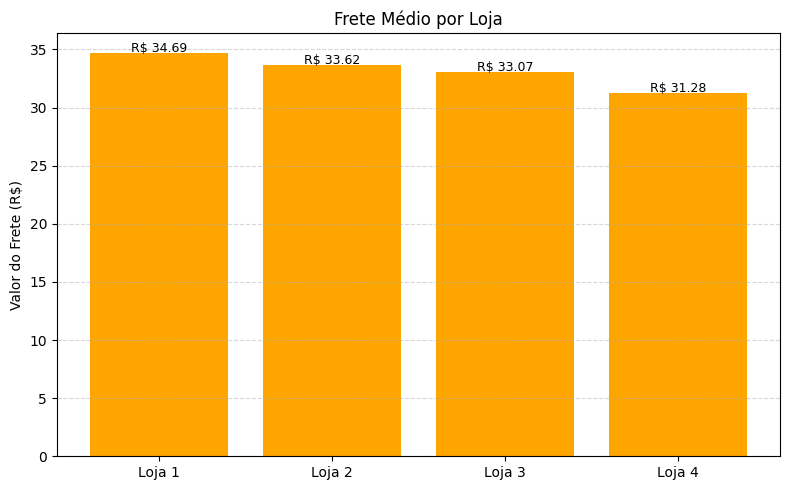

In [9]:
# Calculando o frete médio de cada loja
frete1 = mostrar_frete_medio(loja, "Loja 1")
frete2 = mostrar_frete_medio(loja2, "Loja 2")
frete3 = mostrar_frete_medio(loja3, "Loja 3")
frete4 = mostrar_frete_medio(loja4, "Loja 4")

# Gráfico comparativo dos fretes médios
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
valores = [frete1, frete2, frete3, frete4]

plt.figure(figsize=(8, 5))
plt.bar(lojas, valores, color='orange')
plt.title("Frete Médio por Loja")
plt.ylabel("Valor do Frete (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adicionando os valores nas colunas
for i, v in enumerate(valores):
    plt.text(i, v + 0.1, f"R$ {v:,.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()
